## Data Prep and Understanding Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv('/content/boston.csv')
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12].values.reshape(-1, 1)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (506, 12)
Shape of y: (506, 1)


In [5]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [9]:
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


In [10]:
df.nunique()

,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [11]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


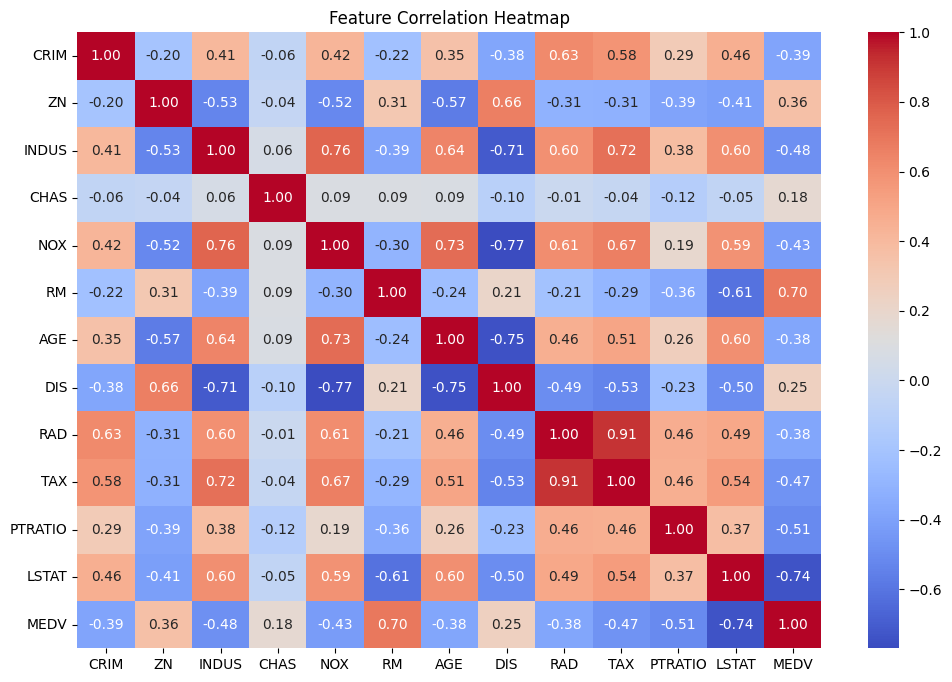

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(X_train)
XtestScaled = scaler.transform(X_test)

## LINEAR REGRESSION

In [16]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

lr_ein_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_ein_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_ein_rmse = np.sqrt(lr_ein_mse)
lr_ein_r2 = r2_score(y_train, y_train_pred_lr)

lr_eout_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_eout_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_eout_rmse = np.sqrt(lr_eout_mse)
lr_eout_r2 = r2_score(y_test, y_test_pred_lr)

print("Basic Linear Regression Results:")
print(f"Training Error (Ein): MAE: {lr_ein_mae}, MSE: {lr_ein_mse}, RMSE: {lr_ein_rmse}, R² Score: {lr_ein_r2}")
print(f"Testing Error (Eout): MAE: {lr_eout_mae}, MSE: {lr_eout_mse}, RMSE: {lr_eout_rmse}, R² Score: {lr_eout_r2}")

Basic Linear Regression Results:
Training Error (Ein): MAE: 3.424468775949534, MSE: 22.604286479417418, RMSE: 4.754396542087904, R² Score: 0.739801993681731
Testing Error (Eout): MAE: 3.1113773882381848, MSE: 22.77770856386609, RMSE: 4.772599769922687, R² Score: 0.6893967884614753


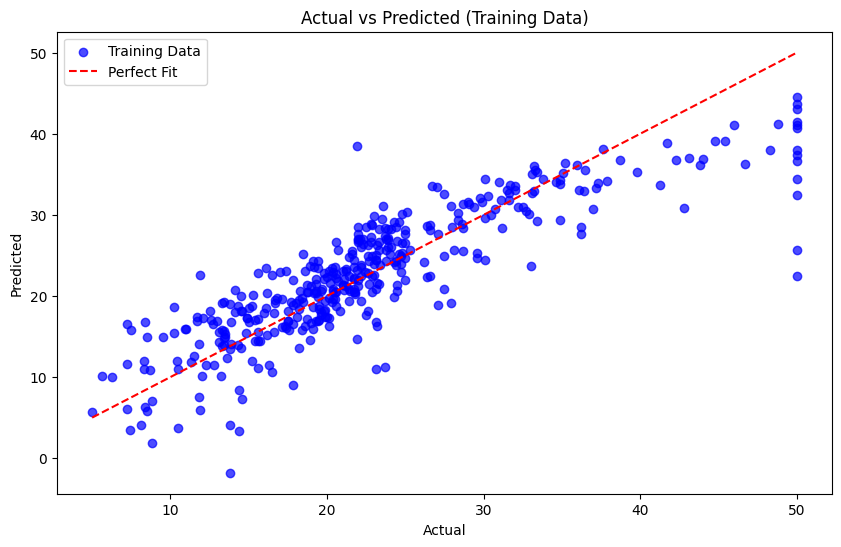

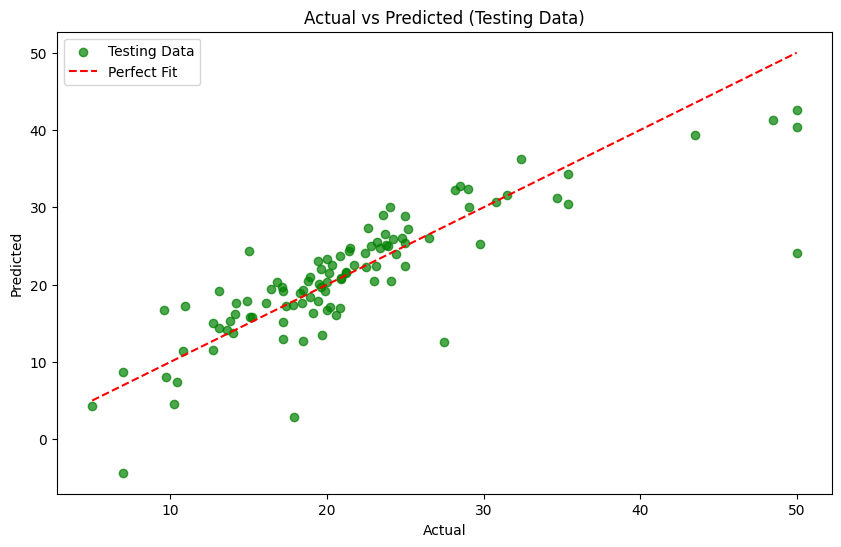

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_lr, color='blue', alpha=0.7, label="Training Data")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Training Data)")
plt.legend()
plt.show()

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lr, color='green', alpha=0.7, label="Testing Data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Testing Data)")
plt.legend()
plt.show()


## POLYNOMIAL REGRESSION

In [23]:
def evaluate_polynomial_degree(X, y, max_degree):
    degrees = []
    r2_scores = []

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_cv_scores = cross_val_score(LinearRegression(), X_poly, y, cv=kf, scoring='r2')
        degrees.append(degree)
        r2_scores.append(np.mean(r2_cv_scores))

    return degrees, r2_scores

degrees, r2_scores = evaluate_polynomial_degree(X, y, max_degree=5)

#Optimal Polynomial Degree
print("\nOptimal Polynomial Degree:")
for deg, score in zip(degrees, r2_scores):
    print(f"Degree: {deg}, Average R² Score: {score}")


Optimal Polynomial Degree:
Degree: 1, Average R² Score: 0.7124259220376005
Degree: 2, Average R² Score: 0.8369575548976386
Degree: 3, Average R² Score: -108472.53885486424
Degree: 4, Average R² Score: -34704.50069639186
Degree: 5, Average R² Score: -79948.2752652902


In [25]:
# choose the highest R² score
optimal_degree = degrees[np.argmax(r2_scores)]
print(f"\nOptimal Polynomial Degree is: {optimal_degree}")

poly_optimal = PolynomialFeatures(degree=optimal_degree)
X_poly_optimal = poly_optimal.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_optimal, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)


y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

poly_ein_mae = mean_absolute_error(y_train_poly, y_train_pred_poly)
poly_ein_mse = mean_squared_error(y_train_poly, y_train_pred_poly)
poly_ein_rmse = np.sqrt(poly_ein_mse)
poly_ein_r2 = r2_score(y_train_poly, y_train_pred_poly)

poly_eout_mae = mean_absolute_error(y_test_poly, y_test_pred_poly)
poly_eout_mse = mean_squared_error(y_test_poly, y_test_pred_poly)
poly_eout_rmse = np.sqrt(poly_eout_mse)
poly_eout_r2 = r2_score(y_test_poly, y_test_pred_poly)

print("\nPolynomial Regression Res:")
print(f"Training Error (Ein): MAE: {poly_ein_mae}, MSE: {poly_ein_mse}, RMSE: {poly_ein_rmse}, R² Score: {poly_ein_r2}")
print(f"Testing Error (Eout): MAE: {poly_eout_mae}, MSE: {poly_eout_mse}, RMSE: {poly_eout_rmse}, R² Score: {poly_eout_r2}")


Optimal Polynomial Degree is: 2

Polynomial Regression Res:
Training Error (Ein): MAE: 1.8427500385315148, MSE: 5.724511595529311, RMSE: 2.3925951591377324, R² Score: 0.9341051306503824
Testing Error (Eout): MAE: 2.562287860242129, MSE: 15.15504827885457, RMSE: 3.89294853277751, R² Score: 0.7933415183869286


## RIDGE REGRESSION

In [26]:
# List of alpha values
alphas = np.logspace(-6, 6, 13)

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for alpha in alphas:
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)

    # Create and fit the Ridge regression model
    model = Ridge(alpha=alpha)

    # Perform 10-Fold Cross-Validation for each alpha
    mae_cv = cross_val_score(model, X_train_poly, y_train, cv=10, scoring='neg_mean_absolute_error')
    mae_scores.append(-mae_cv.mean())

    mse_cv = cross_val_score(model, X_train_poly, y_train, cv=10, scoring='neg_mean_squared_error')
    mse_scores.append(-mse_cv.mean())

    r2_cv = cross_val_score(model, X_train_poly, y_train, cv=10, scoring='r2')
    r2_scores.append(r2_cv.mean())

    rmse_scores.append(np.sqrt(mse_scores[-1]))

# Searching optimal value
optimal_alpha_index = np.argmax(r2_scores)
optimal_alpha = alphas[optimal_alpha_index]

print(f"Optimal Alpha Value: {optimal_alpha}")

# Training using optimal Value
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = Ridge(alpha=optimal_alpha)
model.fit(X_train_poly, y_train)

# predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTraining Error (Ein):")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R² Score:", train_r2)

print("\nTesting Error (Eout):")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R² Score:", test_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.53028e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.80879e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.66008e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.62661e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Optimal Alpha Value: 1e-06

Training Error (Ein):
MAE: 1.8427091960880446
MSE: 5.724512811749016
RMSE: 2.392595413301007
R² Score: 0.9341051166504738

Testing Error (Eout):
MAE: 2.561790135333076
MSE: 15.149849093496185
RMSE: 3.8922807058967606
R² Score: 0.7934124159342025


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.78199e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
